In [1]:
!git clone https://github.com/ultralytics/yolov3
!cd yolov3;pip install -qr requirements.txt

Cloning into 'yolov3'...
remote: Enumerating objects: 9957, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 9957 (delta 20), reused 55 (delta 14), pack-reused 9858
Receiving objects: 100% (9957/9957), 9.37 MiB | 17.94 MiB/s, done.
Resolving deltas: 100% (6684/6684), done.
     |████████████████████████████████| 596 kB 5.0 MB/s 
     |████████████████████████████████| 1.7 MB 37.8 MB/s 
     |████████████████████████████████| 140 kB 64.7 MB/s 
     |████████████████████████████████| 180 kB 61.8 MB/s 
     |████████████████████████████████| 97 kB 7.9 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 


In [2]:
!cat yolov3/requirements.txt

# pip install -r requirements.txt

# Base ----------------------------------------
matplotlib>=3.2.2
numpy>=1.18.5
opencv-python>=4.1.2
Pillow>=7.1.2
PyYAML>=5.3.1
requests>=2.23.0
scipy>=1.4.1
torch>=1.7.0
torchvision>=0.8.1
tqdm>=4.41.0

# Logging -------------------------------------
tensorboard>=2.4.1
wandb

# Plotting ------------------------------------
pandas>=1.1.4
seaborn>=0.11.0

# Export --------------------------------------
# coremltools>=4.1  # CoreML export
# onnx>=1.9.0  # ONNX export
# onnx-simplifier>=0.3.6  # ONNX simplifier
# scikit-learn==0.19.2  # CoreML quantization
# tensorflow>=2.4.1  # TFLite export
# tensorflowjs>=3.9.0  # TF.js export

# Extras --------------------------------------
# albumentations>=1.0.3
# Cython  # for pycocotools https://github.com/cocodataset/cocoapi/issues/172
# pycocotools>=2.0  # COCO mAP
# roboflow
thop  # FLOPs computation


In [3]:
from IPython.display import Image, clear_output  # to display images
import torch

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.10.0+cu111 (Tesla P100-PCIE-16GB)


In [4]:
!nvidia-smi

Wed Dec  8 06:38:44 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
!cd yolov3/data/images;ls -lia

total 656
5242958 drwxr-xr-x 2 root root   4096 Dec  8 06:38 .
5242946 drwxr-xr-x 5 root root   4096 Dec  8 06:38 ..
5242959 -rw-r--r-- 1 root root 487438 Dec  8 06:38 bus.jpg
5242960 -rw-r--r-- 1 root root 168949 Dec  8 06:38 zidane.jpg


## Image Detection

참고 : https://github.com/ultralytics/yolov3/blob/master/tutorial.ipynb

In [7]:
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source data/images
# --project를 설정하지 않으면 자동으로 runs/detect/exp에 detection 결과 저장

detect: weights=['yolov3.pt'], source=data/images, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-5-g9d0e1cf torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

100% 119M/119M [00:01<00:00, 116MB/s]

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients, 156.1 GFLOPs
image 1/2 /content/yolov3/data/images/bus.jpg: 640x480 4 persons, 1 bus, 1 tie, 1 sports ball, Done. (0.021s)
image 2/2 /content/yolov3/data/images/zidane.jpg: 384x640 2 persons, 3 ties, Done. (0.021s)
Speed: 0.5ms pre-process, 20.9ms inference, 17.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


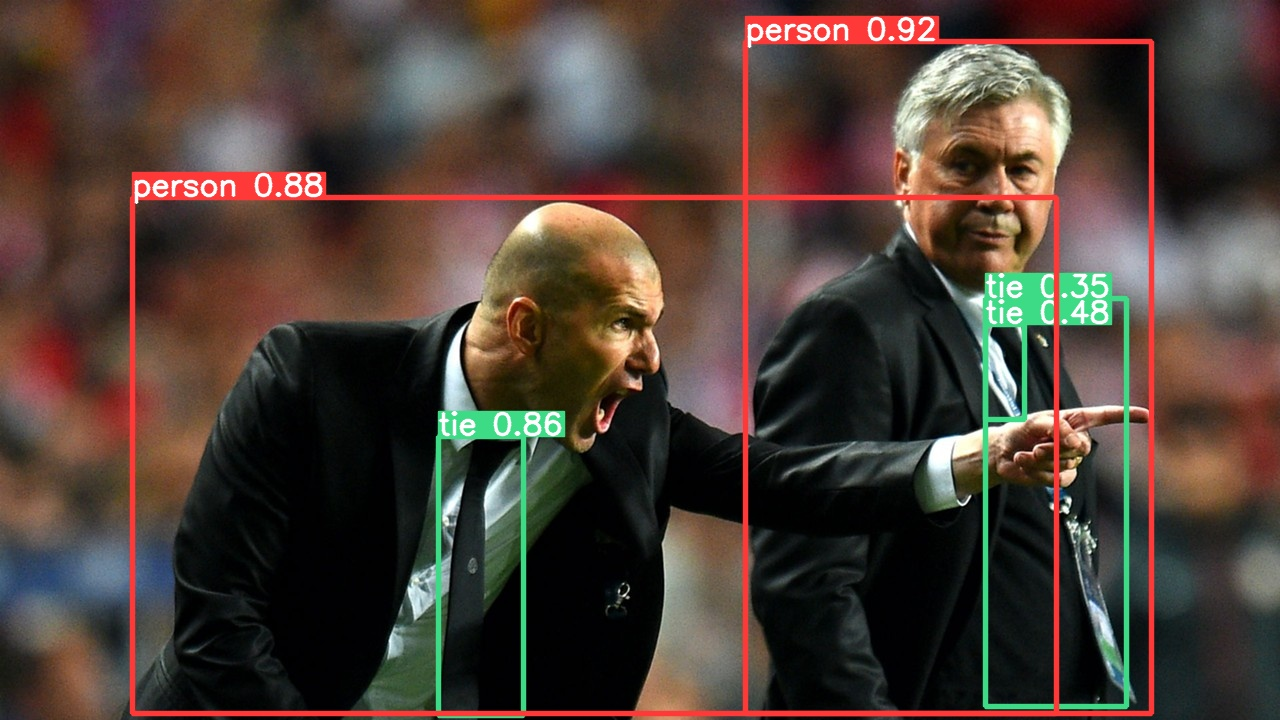

In [8]:
from IPython.display import Image, clear_output 

Image(filename='yolov3/runs/detect/exp/zidane.jpg', width=600)

In [9]:
!mkdir /content/data
!wget -O /content/data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2021-12-08 06:40:01--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘/content/data/beatles01.jpg’

/content/data/beatl 100%[===================>] 374.14K  --.-KB/s    in 0.03s   

2021-12-08 06:40:01 (10.7 MB/s) - ‘/content/data/beatles01.jpg’ saved [383118/383118]



In [10]:
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source /content/data/beatles01.jpg  \
                            --project /content/data  --name=run_image --exist-ok --line-thickness 1

detect: weights=['yolov3.pt'], source=/content/data/beatles01.jpg, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data, name=run_image, exist_ok=True, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-5-g9d0e1cf torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients, 156.1 GFLOPs
image 1/1 /content/data/beatles01.jpg: 512x640 5 persons, 12 cars, 1 handbag, Done. (0.025s)
Speed: 0.5ms pre-process, 24.9ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/run_image


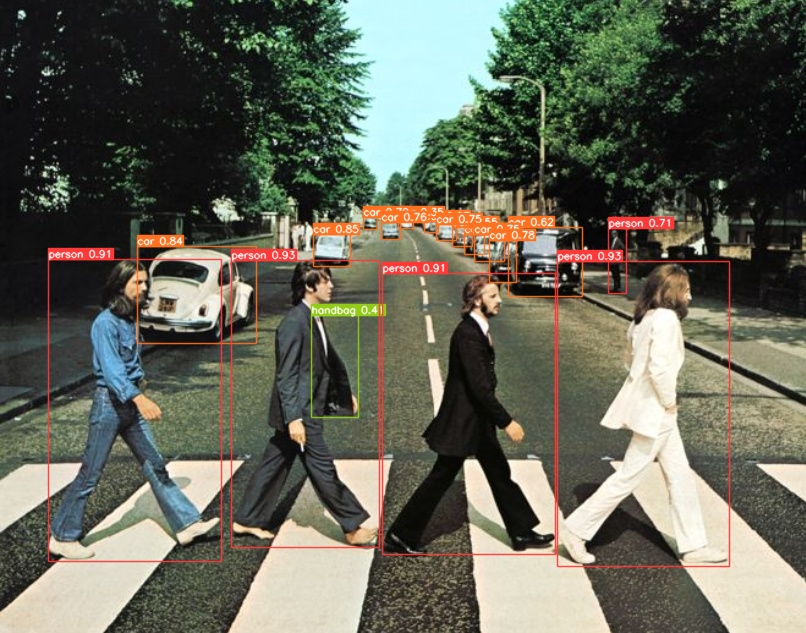

In [11]:
Image(filename='/content/data/run_image/beatles01.jpg', width=600)

## Video Detection

In [12]:
!wget -O /content/data/Night_Day_Chase.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true

--2021-12-08 06:40:30--  https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/Night_Day_Chase.mp4 [following]
--2021-12-08 06:40:31--  https://github.com/chulminkw/DLCV/raw/master/data/video/Night_Day_Chase.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4 [following]
--2021-12-08 06:40:31--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.

In [13]:
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source /content/data/Night_Day_Chase.mp4 \
                            --project=/content/data/run_video --exist-ok --line-thickness 1

detect: weights=['yolov3.pt'], source=/content/data/Night_Day_Chase.mp4, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/run_video, name=exp, exist_ok=True, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-5-g9d0e1cf torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients, 156.1 GFLOPs
video 1/1 (1/1383) /content/data/Night_Day_Chase.mp4: 288x640 2 persons, 1 motorcycle, Done. (0.019s)
video 1/1 (2/1383) /content/data/Night_Day_Chase.mp4: 288x640 2 persons, 1 motorcycle, Done. (0.018s)
video 1/1 (3/1383) /content/data/Night_Day_Chase.mp4: 288x640 2 persons, 1 motorcycle, Done. (0.018s)
video 1/1 (4/1383) /content/data/Night_Day_Chase.mp4: 288x640 2 persons, 1